## Frauenanteil der Bevölkerung zwischen 2000 und 2020

 Gruppe: Miranda Downing, Elena Buchli

 Fragen: 
 
 -In welchen Ländern ist der Bevölkerungsanteil der Frauen zwischen 2000 und 2020 am meisten gesunken oder gestiegen?
 
 -Welche Gründe gibt es für die Veränderungen?

 Quellen:
 
 https://ourworldindata.org/gender-ratio

### 1. Daten beschaffen und laden


In [77]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm


In [21]:
df = pd.read_csv('share-population-female.csv', skiprows=1, 
                 names=['Gebiet','Code','Jahr','Anteil Population weiblich in %']) 
df.head()  

,Gebiet,Code,Jahr,Anteil Population weiblich in %
0,Afghanistan,AFG,1960,48.083054
1,Afghanistan,AFG,1961,48.165000
2,Afghanistan,AFG,1962,48.242370
3,Afghanistan,AFG,1963,48.315890
4,Afghanistan,AFG,1964,48.385273


### 2. Daten vorbereiten

- Der Datensatz ist im Longformat. 
- Für die Analyse werden die Daten pivotiert. Jede Zeile beschreibt die Daten eines Gebiets. Jede Spalte die Daten des entsprechenden Jahres in aufsteigender Reihenfolge.
- Folgende Datentypen kommen in unserem Datentyp vor: Gebiet und Code = Object, Jahr = Integer, Anteil Population weiblich in % = Float
- Die Daten der Gebiete "East Asia and Pacific (WB)",
    "Europe and Central Asia (WB)",
    "European Union (27)",
    "High-income countries",
    "Latin America and Caribbean (WB)",
    "Lower-middle-income countries",
    "Low-income countries",
    "Middle East and North Africa (WB)",
    "Middle-income countries",
    "North America (WB)",
    "South Asia (WB)",
    "Sub-Saharan Africa (WB)", 
    "Upper-middle-income countries", 
    "World"
wurden aus dem Datensatz herausgefiltert, da sie den Vergleich der Länder verfälschen könnten.


In [22]:
zu_entfernende_gebiete =  [
    "East Asia and Pacific (WB)",
    "Europe and Central Asia (WB)",
    "European Union (27)",
    "High-income countries",
    "Latin America and Caribbean (WB)",
    "Lower-middle-income countries",
    "Low-income countries",
    "Middle East and North Africa (WB)",
    "Middle-income countries",
    "North America (WB)",
    "South Asia (WB)",
    "Sub-Saharan Africa (WB)",
    "Upper-middle-income countries",
    "World"
]
df_filtered=df[~df['Gebiet'].isin(zu_entfernende_gebiete)]
df_filtered

,Gebiet,Code,Jahr,Anteil Population weiblich in %
0,Afghanistan,AFG,1960,48.083054
1,Afghanistan,AFG,1961,48.165000
2,Afghanistan,AFG,1962,48.242370
3,Afghanistan,AFG,1963,48.315890
4,Afghanistan,AFG,1964,48.385273
...,...,...,...,...
14548,Zimbabwe,ZWE,2018,52.923756
14549,Zimbabwe,ZWE,2019,52.900196
14550,Zimbabwe,ZWE,2020,52.869328
14551,Zimbabwe,ZWE,2021,52.832848


In [23]:
df_filtered[df_filtered['Gebiet'].isin(zu_entfernende_gebiete)]

,Gebiet,Code,Jahr,Anteil Population weiblich in %


In [24]:
df_pivot = df_filtered.pivot(index='Gebiet', columns='Jahr', values='Anteil Population weiblich in %')
df_pivot.head()

Jahr,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,48.083054,48.165000,48.242370,48.315890,48.385273,48.450287,48.511803,48.570465,48.626003,48.677998,...,49.442104,49.432137,49.423183,49.414608,49.419285,49.437210,49.455486,49.470943,49.488403,49.508720
Albania,48.797123,48.769444,48.734352,48.691364,48.642930,48.592712,48.542490,48.491707,48.440876,48.390232,...,49.840595,49.837696,49.842410,49.856564,49.878532,49.906067,49.939330,49.988052,50.049040,50.117737
Algeria,49.568150,49.549220,49.444250,49.317616,49.144753,48.956123,48.868008,48.871320,48.872444,48.872456,...,49.024277,49.030834,49.037370,49.041508,49.044548,49.048107,49.053470,49.063175,49.075874,49.085533
American Samoa,48.648247,48.671580,48.716620,48.763042,48.812675,48.882050,48.926292,48.941566,48.972977,49.037730,...,49.757523,49.824768,49.892930,49.968285,50.061660,50.161076,50.265210,50.375630,50.507380,50.592910
Andorra,49.454624,49.236492,49.046670,48.847030,48.660362,48.492220,48.301937,48.034298,47.754550,47.520190,...,49.496265,49.528770,49.559560,49.507860,49.373620,49.248800,49.123035,49.014156,48.932106,48.905090


In [91]:
df_pivot_switched = df_filtered.pivot(columns='Gebiet', index='Jahr', values='Anteil Population weiblich in %')
df_pivot_switched.head()

Gebiet,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Jahr,,,,,,,,,,,,,,,,,,,,,
1960,48.083054,48.797123,49.568150,48.648247,49.454624,49.843790,52.338190,49.918377,51.441326,50.858850,...,50.438736,49.624176,49.913860,51.557724,46.093365,49.512570,50.823933,50.090168,50.488903,50.503876
1961,48.165000,48.769444,49.549220,48.671580,49.236492,49.700947,52.294426,49.974580,51.396935,50.850190,...,50.491130,48.948513,49.950275,51.480007,46.239956,49.538395,50.817980,50.133510,50.508675,50.528305
1962,48.242370,48.734352,49.444250,48.716620,49.046670,49.673798,52.269855,50.016743,51.358770,50.845066,...,50.549380,49.090570,49.984783,51.401867,46.377450,49.562202,50.815567,50.186115,50.527843,50.550846
1963,48.315890,48.691364,49.317616,48.763042,48.847030,49.634980,52.253452,50.059998,51.323560,50.836014,...,50.604240,49.216362,50.017612,51.328310,46.508522,49.585060,50.816400,50.251670,50.546440,50.571873
1964,48.385273,48.642930,49.144753,48.812675,48.660362,49.576790,52.273968,50.103413,51.292590,50.826775,...,50.657406,49.329590,50.052970,51.258880,46.637608,49.605910,50.822308,50.307583,50.566364,50.592113


### 3. Statistik der Rohdaten (Analyse im Long-Format)

Über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Variabeln sind kontinuierlich.
- Die Spalte Gebiete enthält 217 verschieden Gebiete.
- Die Spalte Codes enthält 217 verschiedene Codes.
- Es sind Daten zwischen den Jahren 1960 and 2022 mit 63 Datenpunkten von allen Gebieten vollständig vorhanden. Daher konnte keine zusätzliche Auswertung der Gebiete mit den meisten oder wenigsten Datenpunkte erstellt werden.
- Der weibliche Anteil der Population streut zwischen 23.39% und 55.94%.

In [25]:
df_filtered.dtypes

Gebiet                              object
Code                                object
Jahr                                 int64
Anteil Population weiblich in %    float64
dtype: object

#### 3.1 Analyse der Gebiete

In [26]:
print('Anzahl verschiedener Gebiete: ', len(df_filtered['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  217


In [27]:
df_filtered['Gebiet'].value_counts()

Gebiet
Afghanistan      63
Pakistan         63
Netherlands      63
New Caledonia    63
New Zealand      63
                 ..
Gibraltar        63
Greece           63
Greenland        63
Grenada          63
Zimbabwe         63
Name: count, Length: 217, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

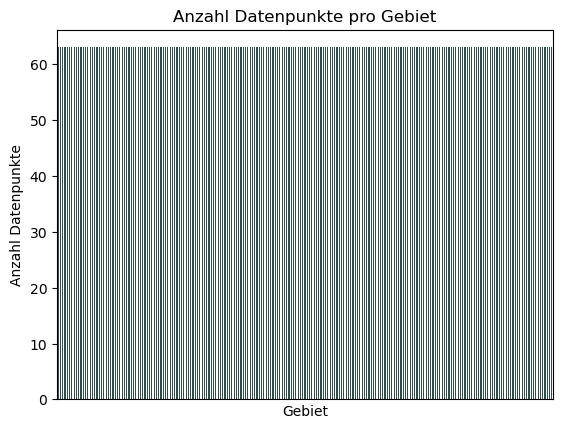

In [88]:
df_filtered['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet',
                                 color='darkslategrey')

#### 3.2 Anzahl der Codes

In [29]:
print('Anzahl verschiedene Codes: ', len(df_filtered['Code'].unique()))

Anzahl verschiedene Codes:  217


In [30]:
df_filtered['Code'].value_counts()

Code
AFG    63
PAK    63
NLD    63
NCL    63
NZL    63
       ..
GIB    63
GRC    63
GRL    63
GRD    63
ZWE    63
Name: count, Length: 216, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Code'}, xlabel='Code', ylabel='Anzahl Datenpunkte'>

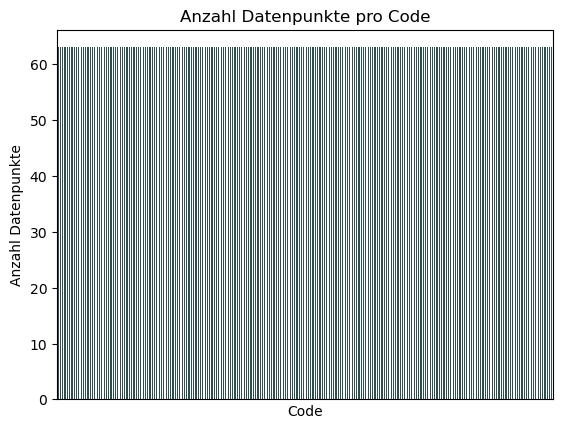

In [67]:
df_filtered['Code'].value_counts().plot(kind='bar',xticks=[], 
                                        ylabel='Anzahl Datenpunkte', 
                                        title='Anzahl Datenpunkte pro Code',
                                        color='darkslategrey')

#### 3.3 Analyse der Jahre

In [32]:
print('Anzahl verschiedener Jahre: ', len(df_filtered['Jahr'].unique()))

Anzahl verschiedener Jahre:  63


In [33]:
df_filtered['Jahr'].value_counts().sort_index()

Jahr
1960    217
1961    217
1962    217
1963    217
1964    217
       ... 
2018    217
2019    217
2020    217
2021    217
2022    217
Name: count, Length: 63, dtype: int64

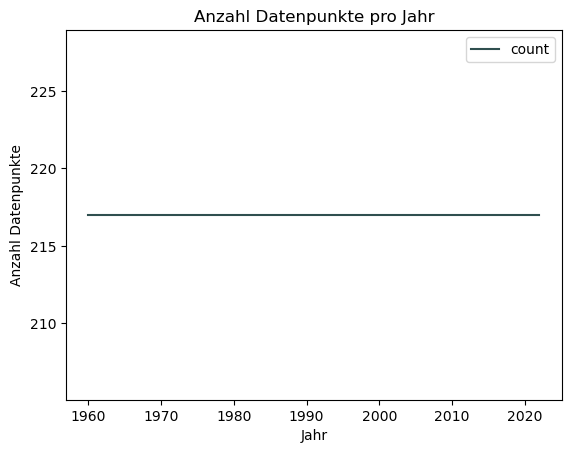

In [69]:
g = df_filtered['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', 
                                                         title='Anzahl Datenpunkte pro Jahr',
                                                         color='darkslategrey')
g.legend()

#### 3.4 Analyse des weiblichen Anteils der Population in %

In [35]:
x=df_filtered["Anteil Population weiblich in %"].describe()
pd.DataFrame(x)

,Anteil Population weiblich in %
count,13671.000000
mean,50.053290
std,2.567333
min,23.394217
25%,49.503991
50%,50.336970
75%,51.156237
max,55.943850


Boxplot

<Axes: title={'center': 'Boxplot des weiblichen Anteils der Population'}, xlabel='Anteil Population weiblich in %'>

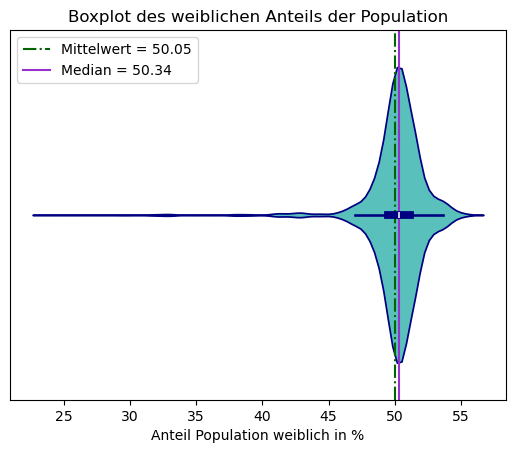

In [65]:
g = df_filtered['Anteil Population weiblich in %'].plot(kind='box', vert=False, 
        title='Boxplot des weiblichen Anteils der Population', 
        xlabel='Anteil Population weiblich in %')

mean = df_filtered['Anteil Population weiblich in %'].mean()
g.axvline(x=mean, color='darkgreen', linestyle='-.', label=f'Mittelwert = {mean:.2f}')

median = df_filtered['Anteil Population weiblich in %'].median()
g.axvline(x=median, color='darkorchid', linestyle='-', label=f'Median = {median:.2f}')

g.legend()

sns.violinplot(x=df_filtered['Anteil Population weiblich in %'], density_norm='count', color='mediumturquoise', linecolor='navy',)

Histogramm

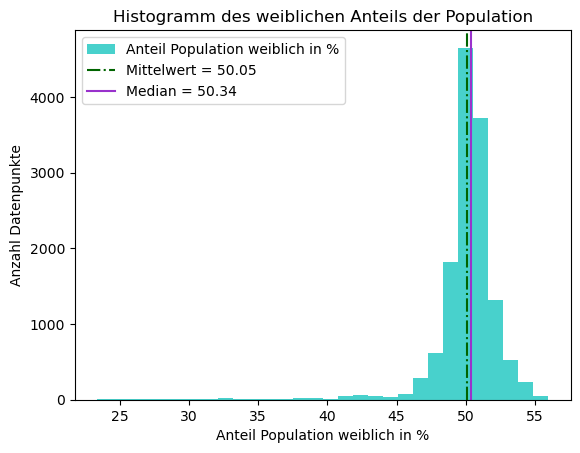

In [70]:
g = df_filtered['Anteil Population weiblich in %'].plot(kind='hist', bins=30, title='Histogramm des weiblichen Anteils der Population', 
                           xlabel='Anteil Population weiblich in %', ylabel='Anzahl Datenpunkte', color='mediumturquoise')
mean = df_filtered['Anteil Population weiblich in %'].mean()
g.axvline(x=df_filtered['Anteil Population weiblich in %'].mean(), color='darkgreen', 
          linestyle='-.', label=f'Mittelwert = {mean:.2f}')

median = df_filtered['Anteil Population weiblich in %'].median()
g.axvline(x=df_filtered['Anteil Population weiblich in %'].median(), 
          color='darkorchid',label=  f'Median = {median:.2f}')

g.legend()

### 4. Analyse
#### Vorgehen
- Berechnung der Differenz des Frauenanteils der Population der einzelenen Gebiete im Jahr 2020 im Vergleich zum Jahr 2000.
- Darstellung der Auswahl der Gebiete mit den grössten und kleinsten Differenzen.
- Filtern der Gebiete mit den höchsten und tiefsten Frauenanteilen.

#### Beobachtungen
- Die Population der foglenden Länder zeigen die stärkste Reduktion des Frauenanteils in den untersuchten 20 Jahren von mehr als 4 Prozentpunkte: Nördliche Marianen, Maldiven, Qatar, Oman
- Die Populatiion der foglenden Länder zeigen die stärkste Zunahme des Frauenanteils in den untersuchten 20 Jahren von mehr als 2 Prozentpunkte: Palau, Nepal, Hong Kong, Britische Jungferninseln

#### Interpretation
-




- Spezifische Untersuchung der Fragestellung (Berechnungen)
Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
Beschreiben der Beobachtungen
Interpretation der Resultate (Hypothesen zu den Resultaten)
Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

#### Berechnungen

Berechnung der Differenzen

In [38]:
diffs= df_pivot[2020]-df_pivot[2000]
diffs= diffs.sort_values()
diffs

Gebiet
Northern Mariana Islands    -6.142812
Maldives                    -6.106927
Qatar                       -5.488384
Oman                        -4.763586
Sint Maarten (Dutch part)   -4.539051
                               ...   
Armenia                      2.117164
Palau                        2.407177
Nepal                        2.844287
Hong Kong                    3.127697
British Virgin Islands       3.163422
Length: 217, dtype: float64

Darstellung der Differenzen

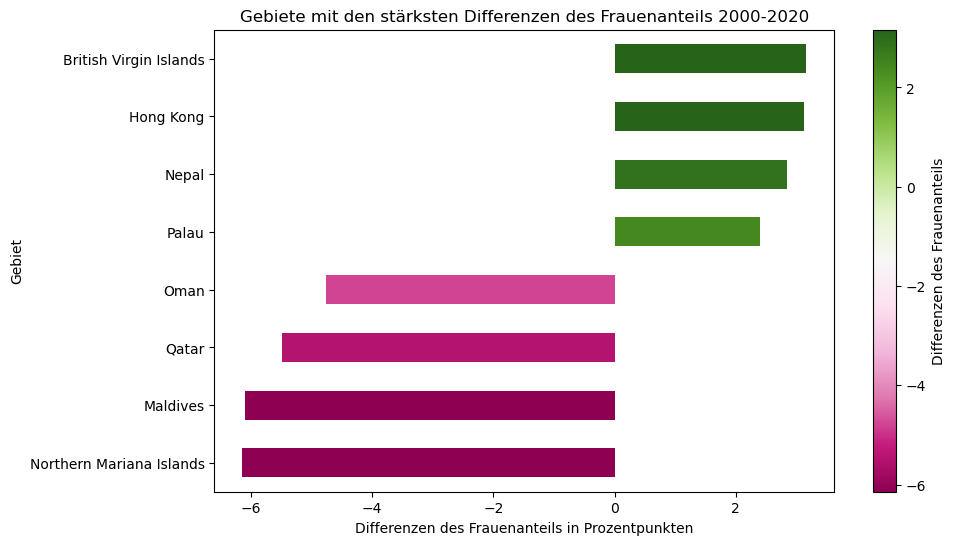

In [90]:
diff_sel = (diffs < -4.6) | (diffs > 2.2)

norm = plt.Normalize(diffs[diff_sel].min(), diffs[diff_sel].max())
colors = cm.PiYG(norm(diffs[diff_sel]))

ax = diffs[diff_sel].plot(
    kind='barh',
    color=colors,
    title='Gebiete mit den stärksten Differenzen des Frauenanteils 2000-2020',
    xlabel='Differenzen des Frauenanteils in Prozentpunkten',
    figsize=(10, 6))

sm = cm.ScalarMappable(cmap='PiYG', norm=norm)
sm.set_array([]) 

cbar = plt.colorbar(sm, ax=ax.figure.axes, label='Differenzen des Frauenanteils')

plt.show()

Liste der Gebiete mit den grössten und kleinsten Differenzen

In [40]:
Gebiets_liste = diffs[diff_sel].index.tolist()
print(Gebiets_liste)

['Northern Mariana Islands', 'Maldives', 'Qatar', 'Oman', 'Palau', 'Nepal', 'Hong Kong', 'British Virgin Islands']


Plot: Frauenanteil der Länder mit der höchsten Zunahme und höchsten Abnahme im Vergleich

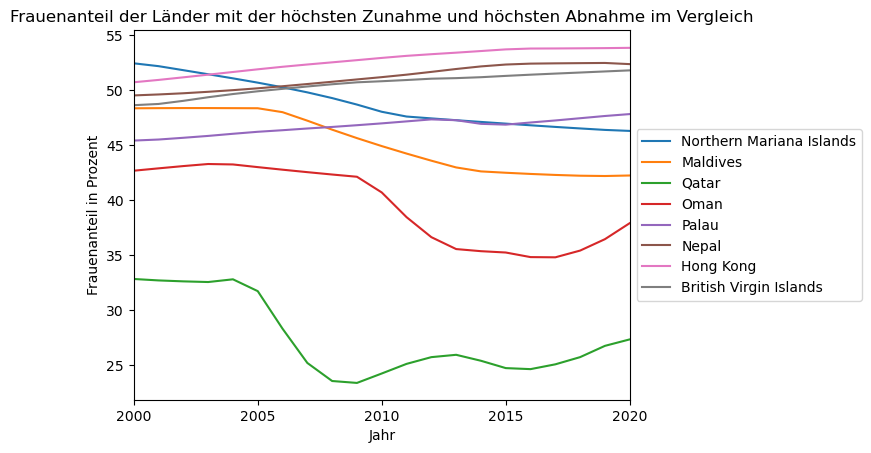

In [106]:
df_vergleich=df_pivot_switched[['Northern Mariana Islands', 'Maldives', 'Qatar', 'Oman', 'Palau', 'Nepal', 
                                'Hong Kong', 'British Virgin Islands']]
ax = df_vergleich.plot (ylabel='Frauenanteil in Prozent',
                        title='Frauenanteil der Länder mit der höchsten Zunahme und höchsten Abnahme im Vergleich',
                        xlim=[2000, 2020])
ax.set_xticks(range(2000, 2021, 5))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

Gebiete mit den höchsten Frauenanteilen im Jahr 2000

In [41]:
df_filtered[df_filtered['Jahr'] == 2000].sort_values(by='Anteil Population weiblich in %', ascending=False).head(5)

,Gebiet,Code,Jahr,Anteil Population weiblich in %
7159,Latvia,LVA,2000,54.359528
13648,Ukraine,UKR,2000,53.690228
3127,Curacao,CUW,2000,53.607590
7537,Lithuania,LTU,2000,53.532177
4828,Georgia,GEO,2000,53.475544


Gebiete mit den höchsten Frauenanteilen im Jahr 2020

In [42]:
df_filtered[df_filtered['Jahr'] == 2020].sort_values(by='Anteil Population weiblich in %', ascending=False).head(5)

,Gebiet,Code,Jahr,Anteil Population weiblich in %
564,Armenia,ARM,2020,54.893520
1131,Belarus,BLR,2020,53.859936
5793,Hong Kong,HKG,2020,53.843403
7179,Latvia,LVA,2020,53.764580
13668,Ukraine,UKR,2020,53.695568


Gebiete mit den tiefsten Frauenanteilen im Jahr 2000

In [43]:
df_filtered[df_filtered['Jahr'] == 2000].sort_values(by='Anteil Population weiblich in %', ascending=True).head(5)

,Gebiet,Code,Jahr,Anteil Population weiblich in %
13711,United Arab Emirates,ARE,2000,31.683650
10750,Qatar,QAT,2000,32.839424
922,Bahrain,BHR,2000,41.025410
6907,Kuwait,KWT,2000,41.453854
9994,Oman,OMN,2000,42.678240


Gebiete mit den tiefsten Frauenanteilen im Jahr 2020

In [98]:
df_filtered[df_filtered['Jahr'] == 2020].sort_values(by='Anteil Population weiblich in %', 
                                                     ascending=True).head(5)

,Gebiet,Code,Jahr,Anteil Population weiblich in %
10770,Qatar,QAT,2020,27.351040
13731,United Arab Emirates,ARE,2020,30.277092
942,Bahrain,BHR,2020,37.702248
10014,Oman,OMN,2020,37.914654
6927,Kuwait,KWT,2020,38.743393
